## Web Scraping

In [1]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 764.7 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.0/157.0 kB 1.8 MB/s eta 0:00:002.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install selenium webdriver-manager

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

import csv
import pandas as pd

options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

In [112]:
file = 'Url.txt'

s_height = driver.execute_script(
    "return window.screen.height;")

In [113]:
with open(file, 'w', newline='', encoding='utf-8') as write_file:
    write_file.writelines('')

In [114]:
driver.get("https://divar.ir/s/iran/car/peugeot/206/2")

In [ ]:
from urllib.parse import urljoin

for i in range(1500):

    # scroll one screen height each time
    driver.execute_script(
        "window.scrollTo(0, {screen_height}*{i});".format(screen_height=s_height, i=i))
    time.sleep(1)


    for each_div in driver.find_elements(
        By.CSS_SELECTOR, '.post-card-item-af972.kt-col-6-bee95.kt-col-xxl-4-e9d46'):
        if each_div == None:
            continue
        url = ''

        # find a tag
        a_tag = each_div.find_element(By.TAG_NAME,'a' )

        if a_tag != None :
            url = urljoin('https://divar.ir', a_tag.get_attribute('href'))
            # find the rent urls and save in the text file
            with open(file, 'a+', newline='', encoding='utf-8') as write_file:
                write_file.writelines(url + '\n')

remove_duplicate_links

In [12]:
with open('Url.txt', 'r') as file:
   links = file.readlines()


unique_links = list(dict.fromkeys(links))

In [13]:
with open('Url.txt', 'w') as f:
    f.writelines(unique_links)

In [14]:
with open('Url.txt', 'r', newline='', encoding='utf-8') as read_obj:
    links = read_obj.readlines()

In [ ]:
data = []
for link in links:
    try:
        driver.get(link)
        details = {}
        description_elements = driver.find_elements(
            By.CSS_SELECTOR, '.kt-group-row-item--info-row')
        if description_elements != None:
            for element in description_elements:
                title = element.find_element(
                    By.CLASS_NAME, 'kt-group-row-item__title').text
                value = element.find_element(
                    By.CLASS_NAME, 'kt-group-row-item__value').text
                details[title] = value
            second_set_elements = driver.find_elements(
                By.CSS_SELECTOR, '.kt-unexpandable-row')
            for element in second_set_elements:
                title = element.find_element(
                    By.CLASS_NAME, 'kt-unexpandable-row__title').text
                value = element.find_element(
                    By.CLASS_NAME, 'kt-unexpandable-row__value-box').text
                details[title] = value
            data.append(details)
    except Exception:
        continue

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
df.to_csv('car.csv',index=False,encoding='utf-8')

## pre-processing

In [1]:
import pandas as pd

df = pd.read_csv('car.csv')

In [2]:
df

,کارکرد,مدل (سال تولید),رنگ,برند و تیپ,نوع سوخت,وضعیت موتور,وضعیت شاسی‌ها,وضعیت بدنه,مهلت بیمهٔ شخص ثالث,گیربکس,قیمت پایه,شاسی جلو,شاسی عقب,نمایشگاه,نوع آگهی,مایل به معاوضه,حداقل مبلغ پیش‌پرداخت,مبلغ هر قسط,تعداد اقساط,فروشنده
0,۳۰۰٬۰۰۰,۱۳۸۳,نقره‌ای,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,رنگ‌شدگی,۹ ماه,دنده‌ای,۱۸۶٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,۴۶٬۰۰۰,۱۴۰۰,سفید,پژو 206 تیپ ۲,بنزینی,سالم,NaN,صافکاری بی‌رنگ,۱ ماه,دنده‌ای,۳۸۵٬۰۰۰٬۰۰۰ تومان,ضربه‌خورده,سالم و پلمپ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,۱۸٬۶۰۰,۱۳۹۹,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,سالم و بی‌خط و خش,۱۱ ماه,دنده‌ای,۴۳۲٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,۲۵۱٬۰۰۰,۱۳۸۸,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,خط و خش جزیی,۹ ماه,دنده‌ای,۲۶۸٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,۲۰۰٬۰۰۰,۱۳۹۰,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,رنگ‌شدگی، در ۲ ناحیه,۱۰ ماه,دنده‌ای,۲۹۰٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,۴۰٬۰۰۰,۱۴۰۰,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,خط و خش جزیی,۶ ماه,دنده‌ای,۴۲۵٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687,۰,۱۴۰۱,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,سالم و بی‌خط و خش,۱۲ ماه,دنده‌ای,۴۹۰٬۰۰۰٬۰۰۰ تومان,NaN,NaN,مهراد خودرو,فروشی,NaN,NaN,NaN,NaN,NaN
1688,۱۲۰٬۰۰۰,۱۳۹۱,سفید,پژو 206 تیپ ۲,بنزینی,سالم,سالم و پلمپ,رنگ‌شدگی,۸ ماه,دنده‌ای,۲۸۰٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,فروشی,NaN,NaN,NaN,NaN,NaN
1689,۹۷٬۰۰۰,۱۳۹۶,سفید,پژو 206 تیپ ۲,بنزینی,سالم,NaN,رنگ‌شدگی، در ۲ ناحیه,NaN,NaN,۳۳۰٬۰۰۰٬۰۰۰ تومان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   کارکرد                 1691 non-null   object
 1   مدل (سال تولید)        1691 non-null   object
 2   رنگ                    1691 non-null   object
 3   برند و تیپ             1691 non-null   object
 4   نوع سوخت               1687 non-null   object
 5   وضعیت موتور            1652 non-null   object
 6   وضعیت شاسی‌ها          1557 non-null   object
 7   وضعیت بدنه             1690 non-null   object
 8   مهلت بیمهٔ شخص ثالث    1588 non-null   object
 9   گیربکس                 1602 non-null   object
 10  قیمت پایه              1691 non-null   object
 11  شاسی جلو               80 non-null     object
 12  شاسی عقب               77 non-null     object
 13  نمایشگاه               123 non-null    object
 14  نوع آگهی               467 non-null    object
 15  مایل به معاوضه       

In [4]:
df['برند و تیپ'].value_counts()

پژو 206 تیپ ۲    1691
Name: برند و تیپ, dtype: int64

In [5]:
df.drop(['برند و تیپ'],inplace=True,axis=1)

In [6]:
df['نوع سوخت'].value_counts()

بنزینی    1687
Name: نوع سوخت, dtype: int64

In [7]:
df.drop(['نوع سوخت'],inplace=True,axis=1)

In [8]:
df.isnull().sum()

کارکرد                      0
مدل (سال تولید)             0
رنگ                         0
وضعیت موتور                39
وضعیت شاسی‌ها             134
وضعیت بدنه                  1
مهلت بیمهٔ شخص ثالث       103
گیربکس                     89
قیمت پایه                   0
شاسی جلو                 1611
شاسی عقب                 1614
نمایشگاه                 1568
نوع آگهی                 1224
مایل به معاوضه           1368
حداقل مبلغ پیش‌پرداخت    1650
مبلغ هر قسط              1650
تعداد اقساط              1650
فروشنده                  1684
dtype: int64

In [9]:
df['قسط'] = df['تعداد اقساط'].isnull()
df['قسط'].value_counts()

True     1650
False      41
Name: قسط, dtype: int64

In [10]:
df['نوع آگهی'].value_counts()

فروشی    467
Name: نوع آگهی, dtype: int64

In [11]:
df.drop(['نوع آگهی'],inplace=True,axis=1)

In [12]:
df = df.dropna(subset=['وضعیت شاسی‌ها'])
df = df.dropna(subset=['وضعیت موتور'])
df = df.dropna(subset=['وضعیت بدنه'])

In [13]:
df['وضعیت موتور'].value_counts()

سالم             1519
تعویض شده          11
نیاز به تعمیر       4
Name: وضعیت موتور, dtype: int64

In [14]:
df['وضعیت شاسی‌ها'].value_counts()

سالم و پلمپ    1523
ضربه‌خورده       10
رنگ‌شده           1
Name: وضعیت شاسی‌ها, dtype: int64

In [15]:
df['وضعیت بدنه'].value_counts()

سالم و بی‌خط و خش       641
خط و خش جزیی            350
رنگ‌شدگی                317
دوررنگ                  127
صافکاری بی‌رنگ           38
تمام‌رنگ                 32
رنگ‌شدگی، در ۲ ناحیه     16
رنگ‌شدگی، در ۱ ناحیه      8
تصادفی                    5
Name: وضعیت بدنه, dtype: int64

In [16]:
df['گیربکس'].value_counts()

دنده‌ای     1480
اتوماتیک       2
Name: گیربکس, dtype: int64

In [17]:
df['گیربکس'] = df['گیربکس'].fillna('دنده‌ای')
df.isnull().sum()

کارکرد                      0
مدل (سال تولید)             0
رنگ                         0
وضعیت موتور                 0
وضعیت شاسی‌ها               0
وضعیت بدنه                  0
مهلت بیمهٔ شخص ثالث        64
گیربکس                      0
قیمت پایه                   0
شاسی جلو                 1534
شاسی عقب                 1534
نمایشگاه                 1423
مایل به معاوضه           1239
حداقل مبلغ پیش‌پرداخت    1495
مبلغ هر قسط              1495
تعداد اقساط              1495
فروشنده                  1527
قسط                         0
dtype: int64

In [18]:
df['مهلت بیمهٔ شخص ثالث'].value_counts()

۶ ماه     246
۱۲ ماه    177
۸ ماه     153
۹ ماه     125
۷ ماه     118
۱۰ ماه    110
۵ ماه     107
۱۱ ماه     98
۳ ماه      98
۴ ماه      96
۲ ماه      73
۱ ماه      69
Name: مهلت بیمهٔ شخص ثالث, dtype: int64

In [19]:
df['مهلت بیمهٔ شخص ثالث'] = df['مهلت بیمهٔ شخص ثالث'].str.replace(' ماه','')
df['مهلت بیمهٔ شخص ثالث'] = df['مهلت بیمهٔ شخص ثالث'].fillna('۰')
df['مهلت بیمهٔ شخص ثالث'] = df['مهلت بیمهٔ شخص ثالث'].astype(int)

In [20]:
df['مایل به معاوضه'].value_counts()

هستم    295
Name: مایل به معاوضه, dtype: int64

In [21]:
df['مایل به معاوضه'] = df['مایل به معاوضه'].fillna('نیستم')

In [22]:
df['نمایشگاه'].value_counts()

اتو خطیب            6
مهراد خودرو         5
دینو خودرو          5
سایپا جلالی         4
اتوگالری میرزایی    3
                   ..
کیا موتورز توکلی    1
اتو آپادانا         1
اتوگالری محمدی      1
اتو شناس 2          1
اتو علایی           1
Name: نمایشگاه, Length: 69, dtype: int64

In [23]:
df['نمایشگاه'] = df['نمایشگاه'].fillna('شخصی')
df.loc[df['نمایشگاه']!='شخصی','نمایشگاه']='نمایشگاهی'

In [24]:
df.isnull().sum()

کارکرد                      0
مدل (سال تولید)             0
رنگ                         0
وضعیت موتور                 0
وضعیت شاسی‌ها               0
وضعیت بدنه                  0
مهلت بیمهٔ شخص ثالث         0
گیربکس                      0
قیمت پایه                   0
شاسی جلو                 1534
شاسی عقب                 1534
نمایشگاه                    0
مایل به معاوضه              0
حداقل مبلغ پیش‌پرداخت    1495
مبلغ هر قسط              1495
تعداد اقساط              1495
فروشنده                  1527
قسط                         0
dtype: int64

In [25]:
drop_columns = ['تعداد اقساط','مبلغ هر قسط','شاسی جلو','شاسی عقب','حداقل مبلغ پیش‌پرداخت','فروشنده','مایل به معاوضه','مهلت بیمهٔ شخص ثالث']
df.drop(drop_columns,inplace=True,axis=1)

In [26]:
df.isnull().sum()

کارکرد             0
مدل (سال تولید)    0
رنگ                0
وضعیت موتور        0
وضعیت شاسی‌ها      0
وضعیت بدنه         0
گیربکس             0
قیمت پایه          0
نمایشگاه           0
قسط                0
dtype: int64

In [27]:
df.drop(df.loc[df['قیمت پایه']=='توافقی'].index, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 1688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   کارکرد           1532 non-null   object
 1   مدل (سال تولید)  1532 non-null   object
 2   رنگ              1532 non-null   object
 3   وضعیت موتور      1532 non-null   object
 4   وضعیت شاسی‌ها    1532 non-null   object
 5   وضعیت بدنه       1532 non-null   object
 6   گیربکس           1532 non-null   object
 7   قیمت پایه        1532 non-null   object
 8   نمایشگاه         1532 non-null   object
 9   قسط              1532 non-null   bool  
dtypes: bool(1), object(9)
memory usage: 121.2+ KB


In [29]:
df['قیمت پایه']= df['قیمت پایه'].str.replace(' تومان','')
df['قیمت پایه']= df['قیمت پایه'].str.replace('٬','')
df['قیمت پایه'] = df['قیمت پایه'].astype('int64')
df['کارکرد'] = df['کارکرد'].str.replace('٬','')
df['قیمت پایه(۱۰ ملیون)'] = df['قیمت پایه']/10000000
df.drop(['قیمت پایه'],inplace=True,axis=1)
df['کارکرد'] = df['کارکرد'].astype('int64')
df['مدل (سال تولید)'] = df['مدل (سال تولید)'].astype('int32')
df

,کارکرد,مدل (سال تولید),رنگ,وضعیت موتور,وضعیت شاسی‌ها,وضعیت بدنه,گیربکس,نمایشگاه,قسط,قیمت پایه(۱۰ ملیون)
0,300000,1383,نقره‌ای,سالم,سالم و پلمپ,رنگ‌شدگی,دنده‌ای,شخصی,True,18.6
2,18600,1399,سفید,سالم,سالم و پلمپ,سالم و بی‌خط و خش,دنده‌ای,شخصی,True,43.2
3,251000,1388,سفید,سالم,سالم و پلمپ,خط و خش جزیی,دنده‌ای,شخصی,True,26.8
4,200000,1390,سفید,سالم,سالم و پلمپ,رنگ‌شدگی، در ۲ ناحیه,دنده‌ای,شخصی,True,29.0
5,31000,1400,سفید,سالم,سالم و پلمپ,سالم و بی‌خط و خش,دنده‌ای,شخصی,True,44.5
...,...,...,...,...,...,...,...,...,...,...
1684,29000,1398,سفید,سالم,سالم و پلمپ,سالم و بی‌خط و خش,دنده‌ای,شخصی,True,40.5
1685,300000,1387,خاکستری,سالم,سالم و پلمپ,رنگ‌شدگی,دنده‌ای,شخصی,True,24.5
1686,40000,1400,سفید,سالم,سالم و پلمپ,خط و خش جزیی,دنده‌ای,شخصی,True,42.5
1687,0,1401,سفید,سالم,سالم و پلمپ,سالم و بی‌خط و خش,دنده‌ای,نمایشگاهی,True,49.0


In [30]:
df.drop(df.loc[df['کارکرد']<0].index,inplace=True)

## Data Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
import numpy as np

In [32]:
np.mean(df['قیمت پایه(۱۰ ملیون)'])

33.59139759921671

/tmp/ipykernel_14593/3788269119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['قیمت پایه(۱۰ ملیون)'])


<Axes: xlabel='قیمت پایه(۱۰ ملیون)', ylabel='Density'>

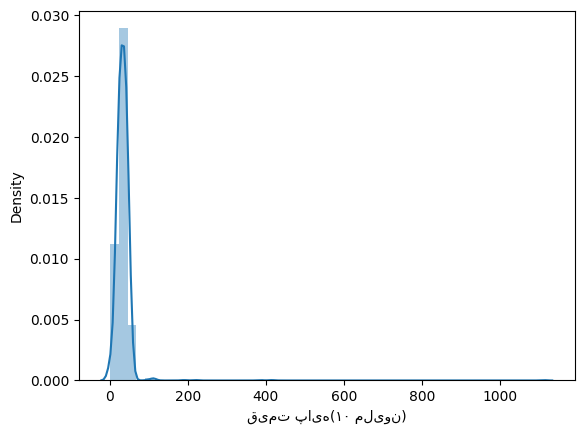

In [33]:
sns.distplot(df['قیمت پایه(۱۰ ملیون)'])

/tmp/ipykernel_14593/1597222548.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['کارکرد'])


<Axes: xlabel='کارکرد', ylabel='Density'>

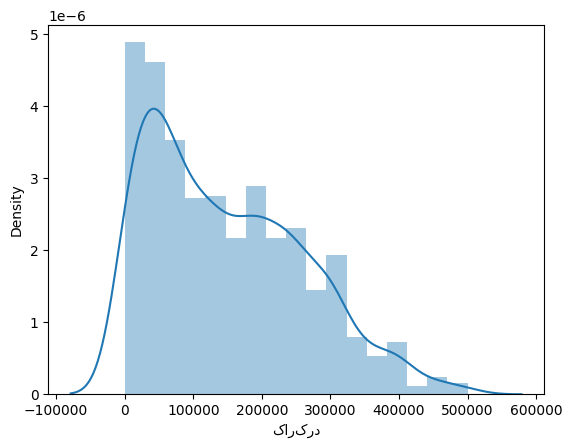

In [34]:
sns.distplot(df['کارکرد'])

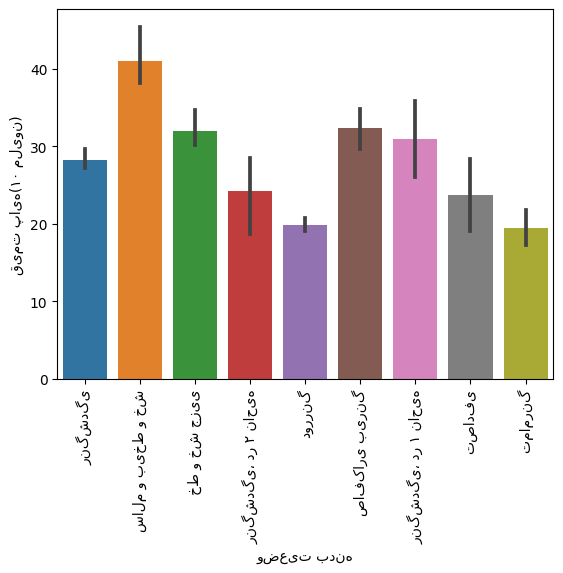

In [35]:
sns.barplot(x=df['وضعیت بدنه'],y=df['قیمت پایه(۱۰ ملیون)'])
plt.xticks(rotation='vertical')
plt.show()

In [36]:
top_salary =  df.groupby('رنگ').agg({'قیمت پایه(۱۰ ملیون)':'mean'}).sort_values('قیمت پایه(۱۰ ملیون)', ascending=False).head(10)
top_salary.head(10)

,قیمت پایه(۱۰ ملیون)
رنگ,
گیلاسی,42.600000
آبی,40.183333
سفید,37.976399
سفید صدفی,34.193939
قرمز,33.940000
سرمه‌ای,33.500000
بادمجانی,32.166667
خاکستری,31.499943
مشکی,28.592465


<Axes: xlabel='count', ylabel='مدل (سال تولید)'>

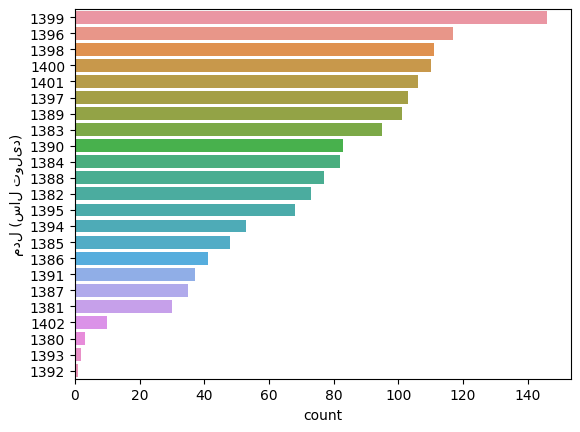

In [37]:
sns.countplot(y=df['مدل (سال تولید)'],order=df['مدل (سال تولید)'].value_counts().index)

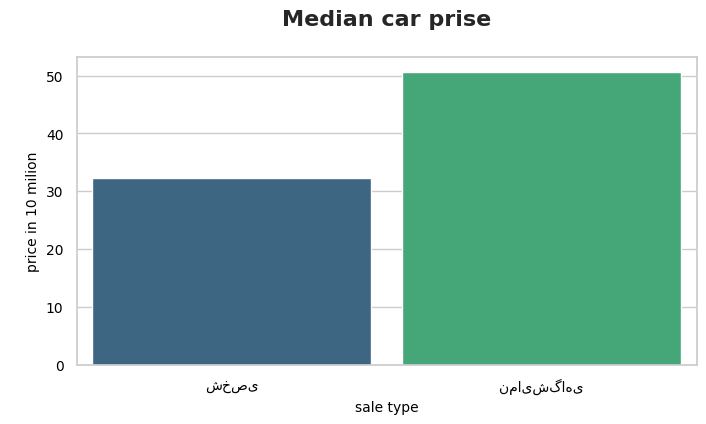

In [38]:
plt.figure(figsize=(8,4))
# Job titles and associated average salary
top_salary = df.groupby('نمایشگاه').agg({'قیمت پایه(۱۰ ملیون)': 'mean'}).round(
    2).sort_values('قیمت پایه(۱۰ ملیون)', ascending=True)

sns.set(style="whitegrid")
ax= sns.barplot(x = top_salary.index, y ='قیمت پایه(۱۰ ملیون)', 
            data = top_salary,           
            palette = "viridis",
            width=0.9)
            
plt.title('Median car prise\n', fontsize=16, fontweight="bold", loc="center")
plt.ylabel('\nprice in 10 milion', color="black", fontsize=10)
plt.xlabel('sale type', color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")



plt.show() 

In [39]:
df.corr()['قیمت پایه(۱۰ ملیون)']

/tmp/ipykernel_14593/4070384800.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['قیمت پایه(۱۰ ملیون)']


کارکرد                -0.266988
مدل (سال تولید)        0.290648
قسط                   -0.023139
قیمت پایه(۱۰ ملیون)    1.000000
Name: قیمت پایه(۱۰ ملیون), dtype: float64

## Model Training

In [40]:

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 1688
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   کارکرد               1532 non-null   int64  
 1   مدل (سال تولید)      1532 non-null   int32  
 2   رنگ                  1532 non-null   object 
 3   وضعیت موتور          1532 non-null   object 
 4   وضعیت شاسی‌ها        1532 non-null   object 
 5   وضعیت بدنه           1532 non-null   object 
 6   گیربکس               1532 non-null   object 
 7   نمایشگاه             1532 non-null   object 
 8   قسط                  1532 non-null   bool   
 9   قیمت پایه(۱۰ ملیون)  1532 non-null   float64
dtypes: bool(1), float64(1), int32(1), int64(1), object(6)
memory usage: 115.2+ KB


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
cat_column = ['نمایشگاه','وضعیت شاسی‌ها','رنگ','وضعیت موتور','وضعیت بدنه','قسط','گیربکس']
val_column = ['کارکرد','مهلت بیمهٔ شخص ثالث','مدل (سال تولید)']

In [44]:
for i in cat_column:
   print(df[i].value_counts())
   print("*************************")

شخصی         1423
نمایشگاهی     109
Name: نمایشگاه, dtype: int64
*************************
سالم و پلمپ    1521
ضربه‌خورده       10
رنگ‌شده           1
Name: وضعیت شاسی‌ها, dtype: int64
*************************
سفید         880
خاکستری      195
نقره‌ای      155
مشکی          87
نوک‌مدادی     61
بژ            34
سفید صدفی     22
نقرآبی        17
آلبالویی      16
قرمز          15
یشمی          14
آبی           12
دلفینی        10
بادمجانی       3
گیلاسی         3
سرمه‌ای        2
طلایی          1
نارنجی         1
قهوه‌ای        1
عدسی           1
سبز            1
ذغالی          1
Name: رنگ, dtype: int64
*************************
سالم             1517
تعویض شده          11
نیاز به تعمیر       4
Name: وضعیت موتور, dtype: int64
*************************
سالم و بی‌خط و خش       639
خط و خش جزیی            350
رنگ‌شدگی                317
دوررنگ                  127
صافکاری بی‌رنگ           38
تمام‌رنگ                 32
رنگ‌شدگی، در ۲ ناحیه     16
رنگ‌شدگی، در ۱ ناحیه      8
تصادفی           

In [45]:
df['نمایشگاه']= df['نمایشگاه'].map({"شخصی":0,"نمایشگاهی":1}).astype(int)

In [46]:
df['رنگ']= df['رنگ'].map({"سفید":0, "خاکستری":1, "نقره‌ای":2,"مشکی":3,"نوک‌مدادی":4,"بژ":5,"سفید صدفی":6,"نقرآبی":7,"آلبالویی":8,"قرمز":9,"یشمی":10,"آبی":11,"دلفینی":12,"بادمجانی":13,"گیلاسی":14,"سرمه‌ای":15,"طلایی":16,"نارنجی":17,"قهوه‌ای":18,"عدسی":19,"سبز":20,"ذغالی":21}).astype(int)

In [47]:
df['وضعیت موتور'] = df['وضعیت موتور'].map({"سالم":0,"تعویض شده":1,"نیاز به تعمیر":2}).astype(int)

In [48]:
df['وضعیت بدنه'] = df['وضعیت بدنه'].map({"سالم و بی‌خط و خش":0,"خط و خش جزیی":1,"رنگ‌شدگی":2,"دوررنگ":3,"صافکاری بی‌رنگ":4,"تمام‌رنگ":5,"رنگ‌شدگی، در ۲ ناحیه":6,"رنگ‌شدگی، در ۱ ناحیه":7,"تصادفی":8}).astype(int)

In [49]:
df['گیربکس'] = df['گیربکس'].map({"دنده‌ای":0,"اتوماتیک":1}).astype(int)

In [50]:
df['قسط']=df['قسط'].map({True:0,False:1}).astype(int)

In [51]:
df['وضعیت شاسی‌ها']=df['وضعیت شاسی‌ها'].map({"سالم و پلمپ":0,"ضربه‌خورده":1,"رنگ‌شده":2}).astype(int)

In [52]:
X = df.drop(columns=['قیمت پایه(۱۰ ملیون)'], axis=1)
y = df['قیمت پایه(۱۰ ملیون)']

In [53]:
df

,کارکرد,مدل (سال تولید),رنگ,وضعیت موتور,وضعیت شاسی‌ها,وضعیت بدنه,گیربکس,نمایشگاه,قسط,قیمت پایه(۱۰ ملیون)
0,300000,1383,2,0,0,2,0,0,0,18.6
2,18600,1399,0,0,0,0,0,0,0,43.2
3,251000,1388,0,0,0,1,0,0,0,26.8
4,200000,1390,0,0,0,6,0,0,0,29.0
5,31000,1400,0,0,0,0,0,0,0,44.5
...,...,...,...,...,...,...,...,...,...,...
1684,29000,1398,0,0,0,0,0,0,0,40.5
1685,300000,1387,1,0,0,2,0,0,0,24.5
1686,40000,1400,0,0,0,1,0,0,0,42.5
1687,0,1401,0,0,0,0,0,1,0,49.0


In [54]:
X.shape

(1532, 9)

In [55]:
y.shape

(1532,)

In [56]:
x_train_val,x_test,y_train_val,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,test_size=0.2,random_state=42)

In [57]:
from sklearn import metrics

ridge_alphas = [0.001, 0.01, 0.1, 1, 10, 100,0.5]
lasso_alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Define hyperparameters to try for Elastic Net
elastic_alphas = [0.001,0.01, 0.1, 1, 10, 100]
elastic_l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

In [58]:
best_params = {}
best_val_scores = {'Ridge': 0, 'Lasso': 0, 'Elastic Net': 0}

In [59]:
for ridge_alpha in ridge_alphas:
    # Train Ridge model with current alpha on training set
    ridge = Ridge(alpha=ridge_alpha)
    ridge.fit(x_train, y_train)

    # Evaluate Ridge model on validation set
    y_pred = ridge.predict(x_val)
    ridge_val_score = metrics.r2_score(y_val, y_pred)

    # Update best hyperparameters if current score is higher than previous best
    if ridge_val_score > best_val_scores['Ridge']:
        best_val_scores['Ridge'] = ridge_val_score
        best_params['Ridge'] = {'alpha': ridge_alpha}


In [60]:
for lasso_alpha in lasso_alphas:
    # Train Lasso model with current alpha on training set
    lasso = Lasso(alpha=lasso_alpha)
    lasso.fit(x_train, y_train)

    # Evaluate Lasso model on validation set
    y_pred = lasso.predict(x_val)
    lasso_val_score = metrics.r2_score(y_val, y_pred)

    # Update best hyperparameters if current score is higher than previous best
    if lasso_val_score > best_val_scores['Lasso']:
        best_val_scores['Lasso'] = lasso_val_score
        best_params['Lasso'] = {'alpha': lasso_alpha}

In [61]:
for elastic_alpha in elastic_alphas:
    for l1_ratio in elastic_l1_ratios:
        # Train Elastic Net model with current alpha and l1_ratio on training set
        elastic = ElasticNet(alpha=elastic_alpha, l1_ratio=l1_ratio)
        elastic.fit(x_train, y_train)

        # Evaluate Elastic Net model on validation set
        y_pred = elastic.predict(x_val)
        elastic_val_score = metrics.r2_score(y_val, y_pred)

        # Update best hyperparameters if current score is higher than previous best
        if elastic_val_score > best_val_scores['Elastic Net']:
            best_val_scores['Elastic Net'] = elastic_val_score
            best_params['Elastic Net'] = {'alpha': elastic_alpha, 'l1_ratio': l1_ratio}


In [62]:
print(best_params)
print(best_val_scores)

{'Ridge': {'alpha': 100}, 'Lasso': {'alpha': 0.1}, 'Elastic Net': {'alpha': 0.1, 'l1_ratio': 0.1}}
{'Ridge': 0.135339761871767, 'Lasso': 0.13491736806015364, 'Elastic Net': 0.13530307947549958}


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [64]:
# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = best_params['Ridge']['alpha'])
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = best_params['Lasso']['alpha'])
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha=best_params['Elastic Net']['alpha'], l1_ratio=best_params['Elastic Net']['l1_ratio'])
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

# 6.DecisionTreeRegressor
dmodel=DecisionTreeRegressor()
dmodel.fit(X_train, y_train)

y_dmodel_pred=dmodel.predict(X_test)

# 7.RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train, y_train)

rf_pred=rf.predict(X_test)

In [65]:
from sklearn.metrics import explained_variance_score as evs 
from sklearn.metrics import r2_score as r2

In [66]:
print(f'Explained Variance Score of OLS model is {evs(y_test, ols_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'Explained Variance Score of Ridge model is {evs(y_test, ridge_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'Explained Variance Score of Lasso model is {evs(y_test, lasso_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'Explained Variance Score of Bayesian model is {evs(y_test, bayesian_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'Explained Variance Score of ElasticNet is {evs(y_test, en_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'Explained Variance Score of DecisionTreeRegressor model is {evs(y_test, y_dmodel_pred)}')
print('-------------------------------------------------------------------------------')
print(f'Explained Variance Score of RandomForestRegressor is {evs(y_test, rf_pred)}')
print('-------------------------------------------------------------------------------')

Explained Variance Score of OLS model is 0.04433804941354569
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.04145760699079504
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.04059413821273772
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.04047708541413131
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.04126131077235573
-------------------------------------------------------------------------------
Explained Variance Score of DecisionTreeRegressor model is -0.10061108037169464
-------------------------------------------------------------------------------
Explained Variance Score of RandomForestRegressor is 0.017616892715087595
---------------------------------------------------

In [67]:
print(f'R-Squared of OLS model is {r2(y_test, ols_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'R-Squared of Ridge model is {r2(y_test, ridge_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'R-Squared of Lasso model is {r2(y_test, lasso_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'R-Squared of Bayesian model is {r2(y_test, bayesian_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'R-Squared of ElasticNet is {r2(y_test, en_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'R-Squared of DecisionTreeRegressor model is {r2(y_test, y_dmodel_pred)}')
print('-------------------------------------------------------------------------------')
print(f'R-Squared of RandomForestRegressor model is {r2(y_test, rf_pred)}')
print('-------------------------------------------------------------------------------')

R-Squared of OLS model is 0.04262536683180529
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.03976230771765399
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.03888920005673091
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.03879640444061416
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.03956685998647613
-------------------------------------------------------------------------------
R-Squared of DecisionTreeRegressor model is -0.10177712993258403
-------------------------------------------------------------------------------
R-Squared of RandomForestRegressor model is 0.01572342009294414
-------------------------------------------------------------------------------


In [68]:
import sklearn.metrics as metrics

print(f'MSE of OLS model is {metrics.mean_squared_error(y_test, ols_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'MSE of Ridge model is {metrics.mean_squared_error(y_test, ridge_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'MSE of Lasso model is {metrics.mean_squared_error(y_test, lasso_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'MSE of Bayesian model is {metrics.mean_squared_error(y_test, bayesian_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'MSE of ElasticNet is {metrics.mean_squared_error(y_test, en_yhat)}')
print('-------------------------------------------------------------------------------')
print(f'MSE of DecisionTreeRegressor model is {metrics.mean_squared_error(y_test, y_dmodel_pred)}')
print('-------------------------------------------------------------------------------')
print(f'MSE of RandomForestRegressor model is {metrics.mean_squared_error(y_test, rf_pred)}')
print('-------------------------------------------------------------------------------')

MSE of OLS model is 3718.0139058641757
-------------------------------------------------------------------------------
MSE of Ridge model is 3729.132744018994
-------------------------------------------------------------------------------
MSE of Lasso model is 3732.523502779633
-------------------------------------------------------------------------------
MSE of Bayesian model is 3732.883879354458
-------------------------------------------------------------------------------
MSE of ElasticNet is 3729.891775392098
-------------------------------------------------------------------------------
MSE of DecisionTreeRegressor model is 4278.808470928846
-------------------------------------------------------------------------------
MSE of RandomForestRegressor model is 3822.4890074645864
-------------------------------------------------------------------------------


In [69]:
import pickle

with open("model-car.pkl", "wb") as f:
    pickle.dump(ols, f)

In [1]:
import pickle
import pandas as pd

with open("model-car.pkl", 'rb') as f:
    model = pickle.load(f)

In [ ]:
import pandas as pd

car_info = {}

car_info['کارکرد'] = [input("کارکرد:\t")]
car_info['مدل (سال تولید)'] = [input("مدل (سال تولید):\t")]
s = "0:سفید1:خاکستری\t2:نقره‌ای\t3:مشکی\t4:نوک‌مدادی"+"\n"
s+="5:بژ\t6:سفید صدفی\tنقرآبی:7\tآلبالویی:8"+"\n"
s+="قرمز:9\t10:یشمی\tآبی:11\tدلفینی:12"+"\n"
s+="بادمجانی:13\tگیلاسی:14\tسرمه‌ای\t:طلایی:16"+"\n"
s+="نارنجی:17\tقهوه‌ای:18\tعدسی:19\tسبز:20\tذغالی:21"+"\n"
car_info['رنگ'] = [input(s+"شماره رنگ ماشین:\t")]
car_info['وضعیت موتور'] = [input("سالم:0\tتعویض شده:1\tنیاز به تعمیر:2"+"شماره وضعیت موتور:\t")]
car_info['وضعیت شاسی‌ها'] = [input("سالم و پلمپ:\0\tضربه‌خورده:1\tرنگ‌شده:2\t شماره وضعیت شاسی:")]
s = "سالم و بی‌خط و خش:0\tخط و خش جزیی:1\tرنگ‌شدگی:2\tدوررنگ:3\tصافکاری بی‌رنگ:4\n"
s+="تمام‌رنگ:5\tرنگ‌شدگی، در ۲ ناحیه:6\tرنگ‌شدگی، در ۱ ناحیه:7\tتصادفی:8\n"
car_info['وضعیت بدنه'] = [input(s+"شماره وضعیت بدنه:\t")]
car_info['گیربکس'] = [input("دنده‌ای:0\tاتوماتیک:1\n شماره نوع گیربکس:\t")]
car_info['نمایشگاه'] = [input("ماشین نمایشگاهی است؟   0:خیر  1:بله\n")]
car_info['قسط'] = [input("قادر به فروش به صورت اقساط هستید؟   0:خیر  1:بله\n")]
print("*********************************************")

df = pd.DataFrame.from_dict(car_info)
pred_price = int(round(model.predict(df)[0],2))*10000000

price = int(input("قیمت پیشنهادی شما:"))
print(f'قیمت تخمین زده شده:  {pred_price}')
diff_price = pred_price-price

print(f'اختلاف قیمت: {abs(diff_price)}')


if abs(diff_price)<10000000:
     print("قیمت منصفانه است")
elif diff_price > 0:
     print("قیمت پایین")
elif diff_price < 0:
     print("قیمت بالا")

کارکرد:	245000
مدل (سال تولید):	1391
0:سفید1:خاکستری	2:نقره‌ای	3:مشکی	4:نوک‌مدادی
5:بژ	6:سفید صدفی	نقرآبی:7	آلبالویی:8
قرمز:9	10:یشمی	آبی:11	دلفینی:12
بادمجانی:13	گیلاسی:14	سرمه‌ای	:طلایی:16
نارنجی:17	قهوه‌ای:18	عدسی:19	سبز:20	ذغالی:21
شماره رنگ ماشین:	0
